In [1]:
import numpy as np

import chugunov_indicator as chug
from chugunov_indicator.plotting import plt

In [2]:
data = chug.DetonationData("./data/subch_plt08582/")

yt : [INFO     ] 2024-09-12 04:27:07,450 Parameters: current_time              = 0.40003216130915
yt : [INFO     ] 2024-09-12 04:27:07,451 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2024-09-12 04:27:07,452 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-12 04:27:07,452 Parameters: domain_right_edge         = [5.12000000e+09 1.02400000e+10 6.28318531e+00]


In [3]:
T, D = data.D_T_meshgrid()

In [8]:
i = 0
scn_args = {
    "abar": data.data["abar"][i],
    "zbar": data.data["zbar"][i],
    "z2bar": data.data["z2bar"][i],
    **data.data["ScreenFactors"][0]
}

In [9]:
screening_factors = chug.chugunov_2009(temp=T, dens=D, **scn_args)
screening_factors

array([[1.00038038e+00, 1.00035058e+00, 1.00032309e+00, ...,
        1.00000013e+00, 1.00000012e+00, 1.00000011e+00],
       [1.00043678e+00, 1.00040258e+00, 1.00037104e+00, ...,
        1.00000015e+00, 1.00000014e+00, 1.00000013e+00],
       [1.00050147e+00, 1.00046224e+00, 1.00042606e+00, ...,
        1.00000017e+00, 1.00000016e+00, 1.00000015e+00],
       ...,
       [8.05469231e+10, 2.88763566e+10, 1.06658805e+10, ...,
        1.07155440e+00, 1.06654811e+00, 1.06188985e+00],
       [3.43510487e+11, 1.20112009e+11, 4.32198412e+10, ...,
        1.08091103e+00, 1.07525061e+00, 1.06998668e+00],
       [1.44418165e+12, 4.94586335e+11, 1.74097828e+11, ...,
        1.09149907e+00, 1.08509155e+00, 1.07913726e+00]])

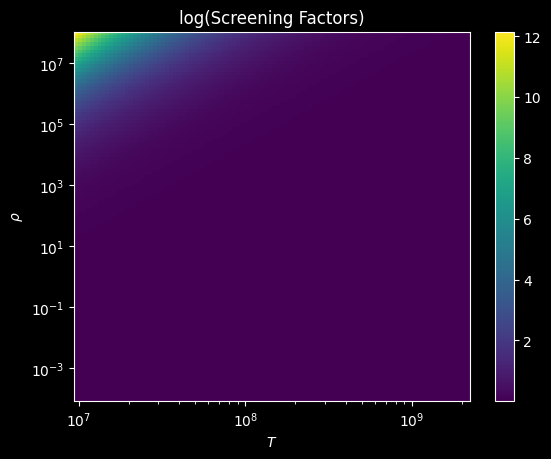

In [10]:
chug.D_T_colorgraph(T, D, np.log10(screening_factors))

plt.title("log(Screening Factors)")
plt.show()

As shown above, the screening factor increases with $\rho$ and decreases with $T$.

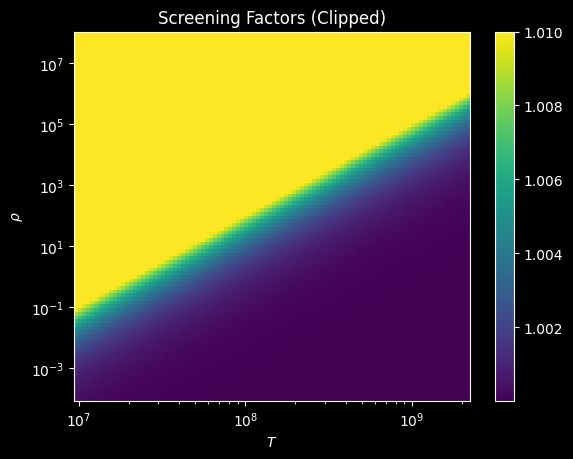

In [11]:
chug.D_T_colorgraph(T, D, np.where(screening_factors > data.threshold, data.threshold, screening_factors))

plt.title("Screening Factors (Clipped)")
plt.show()

Thus, computing the screening can be skipped when
$$
    \rho(T) \leq 10^{-c} T^{k},
$$
where in log-log space, $-c$ is the $\log \rho$-intercept and $k$ is the slope of the line. The parameters $k,c$ are functions of the parameters
$$
    \braket{A}, \braket{Z}, \braket{Z^2}; Z_1, A_1, Z_2, A_2,
$$
where the first three are properties of the composition/plasma state, and the latter four are properties of the screening pair in question.